<a href="https://colab.research.google.com/github/Blvisse/10-Academy/blob/test_branches/twitterAnlysisDay3/TweetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libararies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**The workflow diagram for the process**

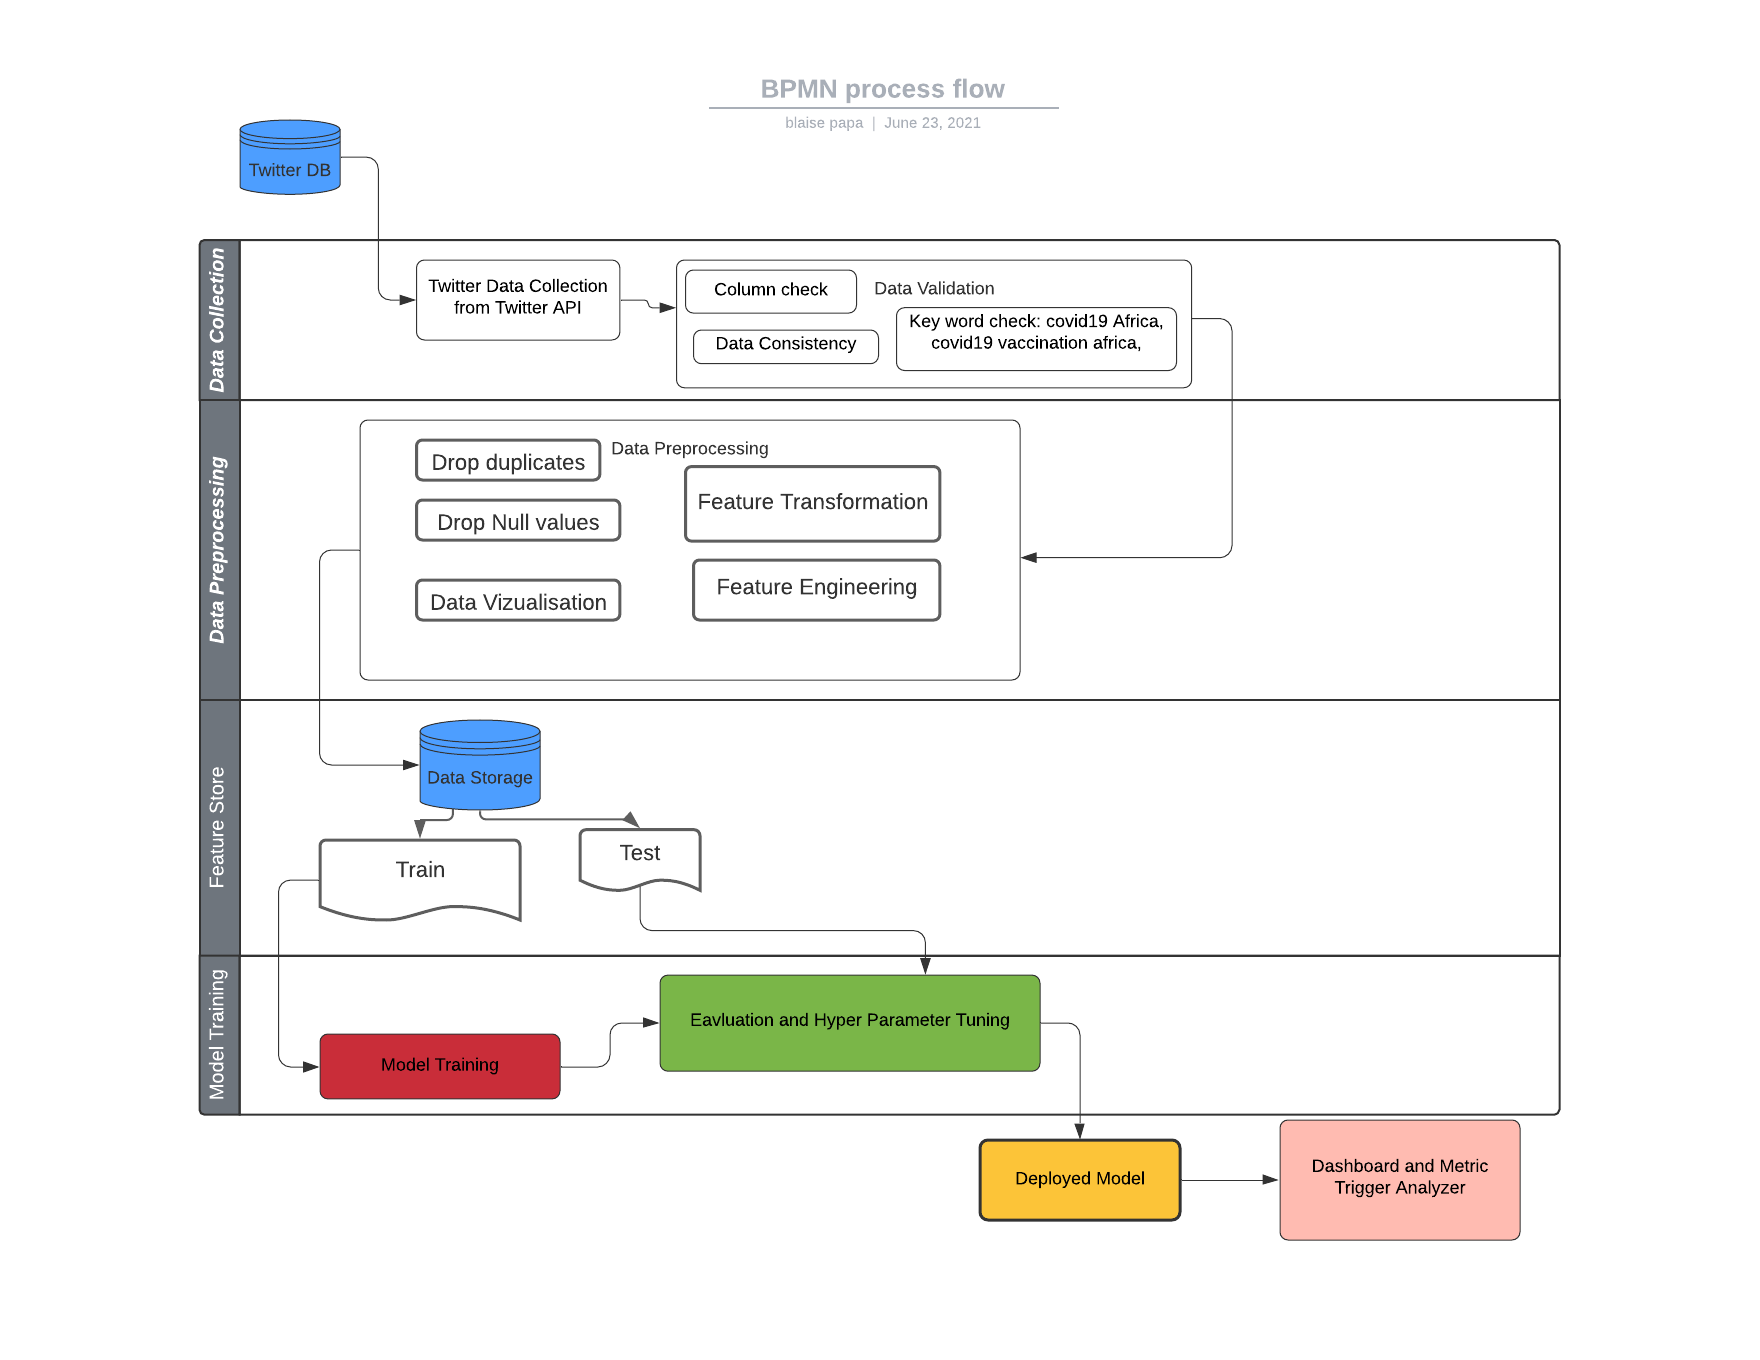

In [2]:
from google.colab import files

In [ ]:
files.upload()

Saving __init__.py to __init__.py
Saving clean_tweets_dataframe.py to clean_tweets_dataframe.py
Saving extract_dataframe.py to extract_dataframe.py


{'__init__.py': b'',
 'clean_tweets_dataframe.py': b'class Clean_Tweets:\r\n    """\r\n    The PEP8 Standard AMAZING!!!\r\n    """\r\n    import pandas as pd \r\n\r\n    def __init__(self, df:pd.DataFrame):\r\n        self.df = df\r\n        print(\'Automation in Action...!!!\')\r\n        \r\n    def drop_unwanted_column(self, df:pd.DataFrame)->pd.DataFrame:\r\n        """\r\n        remove rows that has column names. This error originated from\r\n        the data collection stage.  \r\n        """\r\n        unwanted_rows = df[df[\'retweet_count\'] == \'retweet_count\' ].index\r\n        df.drop(unwanted_rows , inplace=True)\r\n        df = df[df[\'polarity\'] != \'polarity\']\r\n        \r\n        return df\r\n    def drop_duplicate(self, df:pd.DataFrame)->pd.DataFrame:\r\n        """\r\n        drop duplicate rows\r\n        """\r\n        \r\n        df.drop_duplicates()\r\n        \r\n        return df\r\n    def convert_to_datetime(self, df:pd.DataFrame)->pd.DataFrame:\r\n     

In [3]:
!python extract_dataframe.py


In [4]:
!python clean_tweets_dataframe.py 

Automation in Action...!!!
The file has been saved!


In [5]:
data=pd.read_csv('/content/cleaneded.csv')

In [6]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",1.666667e-01,0.188889,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,2.800000e-01,0.620000,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus to...,5.083333e-01,0.783333,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...",USA
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageous...,3.700743e-17,0.633333,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...","Nord-Pas-de-Calais, France"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2021-06-19 07:40:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Australia is sending vaccines.\nAustralia is s...,1.000000e-01,0.400000,en,78.0,12.0,r α v α í 🥥,ravaifiji,1577,538,[],"[{'screen_name': 'pseudofijian', 'name': 'Rone...",Fiji
2474,2021-06-19 07:40:29+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The Truth Behind COVID-19 Vaccines (6) —— Bell...,-3.861111e-01,0.622222,en,2.0,2.0,画画,Hhuatakedownccp,697,303,"[{'text': 'DrLiMengYan', 'indices': [117, 129]...","[{'screen_name': 'edendomain', 'name': '新西兰奥克兰...","Osaka-shi Chuo, Osaka"
2475,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",Covid19 vaccines reach the remotest places of ...,-5.000000e-02,0.400000,en,113.0,87.0,bitu,bitu_50,410,483,[],"[{'screen_name': 'N_RamchanderRao', 'name': 'N...","Jehanabad, India"
2476,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael Y...",8.611111e-02,0.197222,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...","The boro, MA"


In [ ]:
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",1.666667e-01,0.188889,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,2.800000e-01,0.620000,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus to...,5.083333e-01,0.783333,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...",USA
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageous...,3.700743e-17,0.633333,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...","Nord-Pas-de-Calais, France"


In [7]:
class  dataCleaning:
    
    """
    This module is focused on data cleaning steps
    
    Functions in the module transform the raw data to a better state
    
    """

    import pandas as pd

    #create a constructor with the data
    def __init__(self,data:pd.DataFrame):

      self.data=data 

    #drop null columns

    def dropNullCols(self,data:pd.DataFrame)->pd.DataFrame:
        
        data=data.dropna(inplace=True)
        
        return data
    
    
    
    #strip tweets from the dictionary 
    # def stripTweets(self,data:pd.DataFrame)->pd.DataFrame:
    #     data[cols]=data[cols].apply(lambda x: x.strip(":")[1])
        
    #convert the created_at column to date time
    def fixDateTime(self,data:pd.DataFrame)->pd.DataFrame:
        data['created_at']=pd.to_datetime(data['created_at'])

        return data

    
 

In [8]:
#generate a new column score based on polarity
def text_category(pval):
      if pval==0:
        return "neutral"
      elif pval>0:
        return "positive"
      else:
        return "negative"

In [9]:
data['score']=data['polarity'].apply(lambda x:text_category(x))

In [10]:
data['score'].value_counts()

positive    1841
negative     398
neutral      239
Name: score, dtype: int64

In [11]:

    
       
    
    
    
class dataFE:
    df=data
    #create a score column to classify tweets by polarity score
    def __init__(self, df):
        
        self.df = df

        print('Working on your data....!!')




      

    
        
        
    def hourofDay(self,df):
        df['hour']=pd.DatetimeIndex(df['created_at']).hour

        return df
    def dayofYear(self,df):
        df['day']=pd.DatetimeIndex(df['created_at']).day

        return df
    def genHashTags(self,df):
      df['hashtags']=data['original_text'].str.findall(r'#.*?(?=\s|$)')
      df['hashtags']=[" ".join(hashtag) for hashtag in data['hashtags']]

      return df
    def stripText(self,df):
        df['original_text']=df['original_text'].apply(lambda x: x.lower())
        df['original_text']=df['original_text'].apply(lambda x: x.replace('#',''))
        df['original_text']=df['original_text'].apply(lambda x: x.replace('"',''))
        

        return df
    

    def cleanText(self,data):
      data['user_mentions']=data['user_mentions'].apply(lambda x:x.split(",")[1].split(":")[1])

      #data['user_mentions']=data['user_mentions'].apply(lambda x:x.strip("''"))

    def getFeatures(self):
      # data1=self.text_category(data['polarity'])
      data2=self.hourofDay(data)
      data3=self.dayofYear(data2)
      data4=self.genHashTags(data3)
      data5=self.stripText(data4)
      data6=self.cleanText(data5)

      print("WOrk is done enjoy!!")

      return data5
      

class dataViz:
    def countPlots(df,cols):
        df[cols].value_counts().plot(kind='bar')

    def histPlot(df,cols):
      sns.distplot(df[cols])
        
    def freqWords(df,cols):
        import matplotlib.pyplot as plt
        from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
        plt.figure(figsize=(20, 10))
        plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(df[cols].values)))
        plt.axis('off')
        plt.title('Most Frequent Words In Our Tweets',fontsize=16)
        plt.show()
    
        


In [12]:
dfCleanUp=dataFE(data)
data=dfCleanUp.getFeatures()

Working on your data....!!


In [13]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,score,hour,day
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",🚨africa is in the midst of a full-blown third ...,1.666667e-01,0.188889,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,,'Telegraph Global Health Security',Mass,positive,17,18
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","dr moeti is head of who in africa, and one of ...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,,'Anthony Costello',"Edinburgh, Scotland",positive,17,18
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",i think it’s important that we don’t sell cova...,2.800000e-01,0.620000,en,72.0,20.0,Ash Paul,pash22,28250,30819,,'Prof Peter Hotez MD PhD',United Kingdom,positive,17,18
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",i’m pleased to welcome the wecandothis bus to ...,5.083333e-01,0.783333,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,#WeCanDoThis #COVID19,'Rochelle Walensky,USA,positive,17,18
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",yet another amazingly qualified and courageous...,3.700743e-17,0.633333,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,,'Joel Smalley 🌸',"Nord-Pas-de-Calais, France",positive,17,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2021-06-19 07:40:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",australia is sending vaccines.\naustralia is s...,1.000000e-01,0.400000,en,78.0,12.0,r α v α í 🥥,ravaifiji,1577,538,,'Roneel Kumar🦠✊🏾',Fiji,positive,7,19
2474,2021-06-19 07:40:29+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",the truth behind covid-19 vaccines (6) —— bell...,-3.861111e-01,0.622222,en,2.0,2.0,画画,Hhuatakedownccp,697,303,#DrLiMengYan #CCPVirus #Covid19 #UnrestrictedB...,'新西兰奥克兰伊甸农场',"Osaka-shi Chuo, Osaka",negative,7,19
2475,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",covid19 vaccines reach the remotest places of ...,-5.000000e-02,0.400000,en,113.0,87.0,bitu,bitu_50,410,483,#VaccinationDrive.,'N Ramchander Rao',"Jehanabad, India",negative,7,19
2476,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","former pfizer vp and virologist, dr. michael y...",8.611111e-02,0.197222,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,#Covid19,'The HighWire',"The boro, MA",positive,7,19


In [ ]:
# import re
# def find_hashtags(tweet):
#     '''This function will extract hashtags'''
#     return re.findall("('[A-Za-z]+[A-Za-z0-9-_]+',)", tweet)

In [ ]:
# removeWord=['text','indices']
# pat=r'\b(?:{})\b'.format('|'.join(removeWord))


In [ ]:
data['created_at']=pd.to_datetime(data['created_at'])

In [53]:
data['score'].value_counts()

positive    1841
negative     398
neutral      239
Name: score, dtype: int64

In [54]:
#drop the neutral tweet entries as we aren't intrested in neutral tweets
data.drop(data.loc[data['score']=='neutral'].index, inplace=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2477
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       2239 non-null   object 
 1   source           2239 non-null   object 
 2   original_text    2239 non-null   object 
 3   polarity         2239 non-null   float64
 4   subjectivity     2239 non-null   float64
 5   lang             2239 non-null   object 
 6   favorite_count   2239 non-null   float64
 7   retweet_count    2239 non-null   float64
 8   original_author  2239 non-null   object 
 9   screen_name      2239 non-null   object 
 10  followers_count  2239 non-null   int64  
 11  friends_count    2239 non-null   int64  
 12  hashtags         2239 non-null   object 
 13  user_mentions    2239 non-null   object 
 14  place            2239 non-null   object 
 15  score            2239 non-null   object 
 16  hour             2239 non-null   int64  
 17  day           

In [64]:
data['hashtags'].value_counts()

#COVID19                                                                  671
-                                                                         562
#WeCanDoThis #COVID19                                                      85
#coronavirus                                                               70
#Covid19                                                                   45
                                                                         ... 
#Ebola #COVID19                                                             1
#CovidVaccine #Moderna #Pfizer #COVID19 #scicomm                            1
#ExpertsKiSuno                                                              1
#Ethiopia #COVID19                                                          1
#COVID19 #Red4Research, #research #diagnostics, #treatments, #COVID19.      1
Name: hashtags, Length: 252, dtype: int64

In [65]:
data["hashtags"].replace({"":"-"}, inplace=True)
data.drop(data.loc[data['hashtags']=='-'].index, inplace=True)

In [66]:
data['hashtags'].value_counts()

#COVID19                                                                  671
#WeCanDoThis #COVID19                                                      85
#coronavirus                                                               70
#Covid19                                                                   45
#COVID19 #Africa,                                                          43
                                                                         ... 
#Ebola #COVID19                                                             1
#CovidVaccine #Moderna #Pfizer #COVID19 #scicomm                            1
#ExpertsKiSuno                                                              1
#Ethiopia #COVID19                                                          1
#COVID19 #Red4Research, #research #diagnostics, #treatments, #COVID19.      1
Name: hashtags, Length: 251, dtype: int64

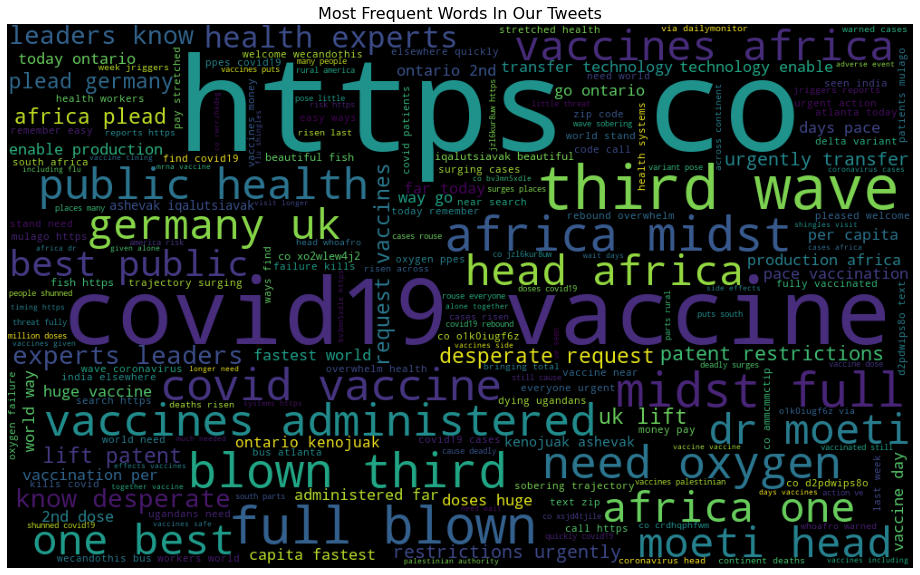

In [14]:
dataViz.freqWords(data,'original_text')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


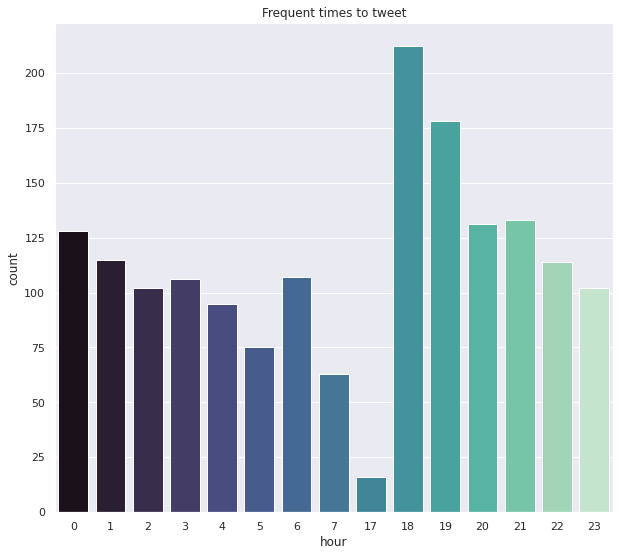

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

plt.figure(figsize=(10,9))
plt.title("Frequent times to tweet")
sns.countplot(data['hour'],palette='mako');


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


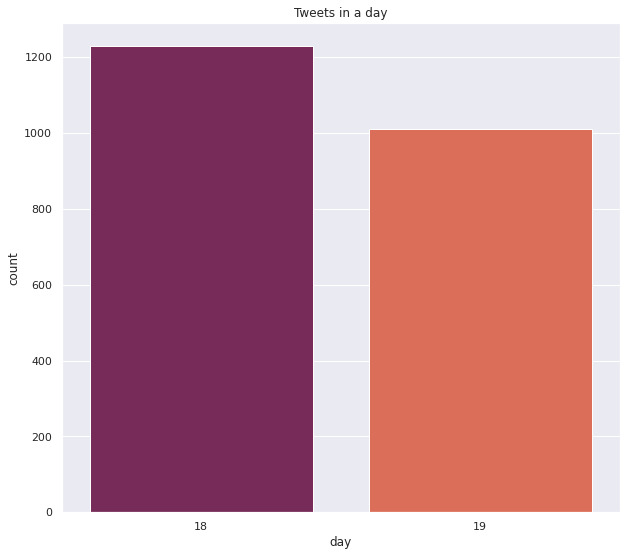

In [57]:
plt.figure(figsize=(10,9))
plt.title("Tweets in a day")
sns.countplot(data['day'],palette='rocket');


In [ ]:
# plt.figure(figsize=(10,9))
# plt.title("Frequent times to tweet")
# plt.xticks(rotation=90)
# sns.countplot(data['hashtags'],palette='mako');


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128375 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128153 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128154 missing from current font.
  font.se

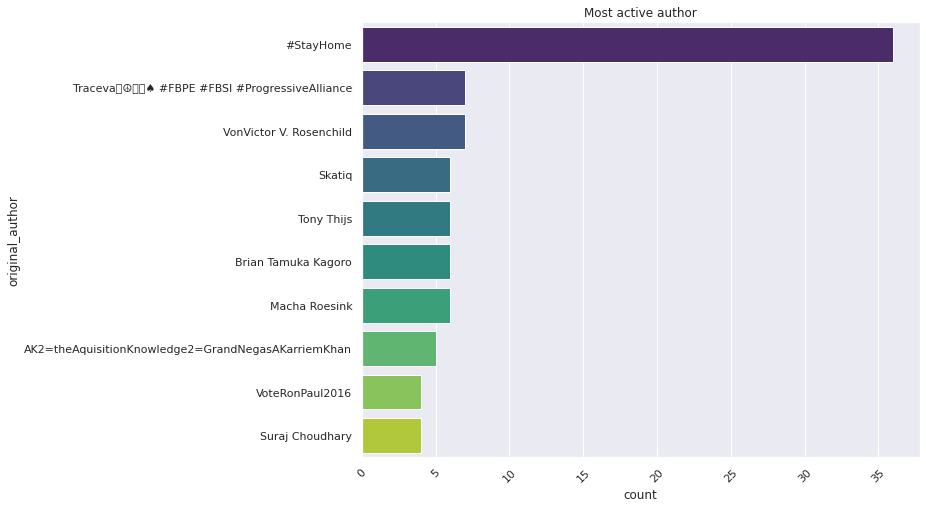

In [81]:
plt.figure(figsize=(10,8));
sns.countplot(y=data['original_author'],order=data['original_author'].value_counts()[:10].index,palette='viridis')
plt.title("Most active author")
plt.xticks(rotation=45);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3379 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/u

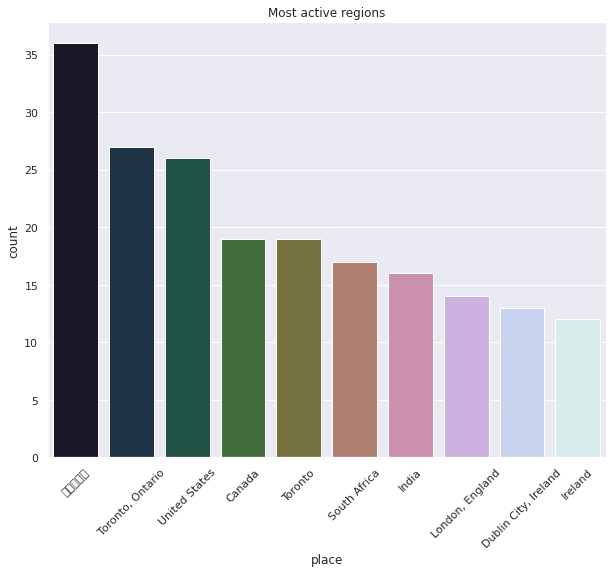

In [69]:


sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(10,8));
sns.countplot(data['place'],order=data['place'].value_counts()[:10].index,palette='cubehelix')
plt.title("Most active regions")
plt.xticks(rotation=45);


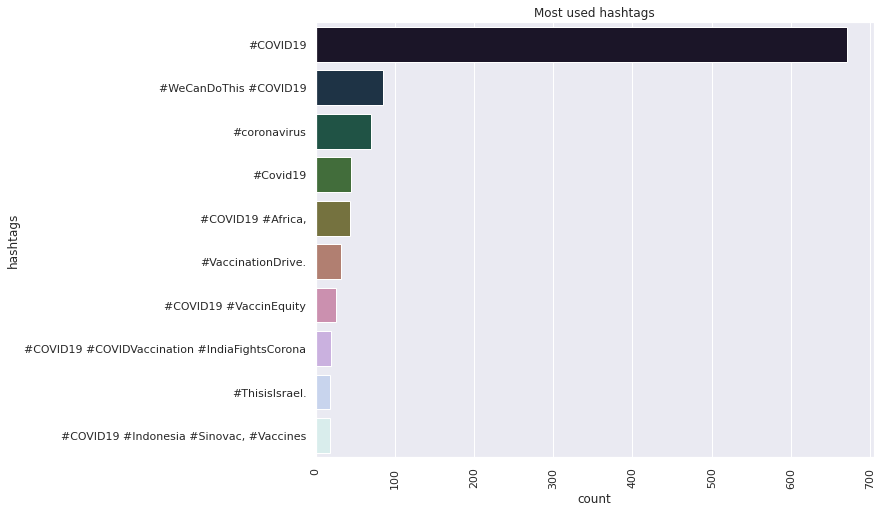

In [80]:
plt.figure(figsize=(10,8));
sns.color_palette("cubehelix", as_cmap=True)
sns.countplot(y=data['hashtags'],order=data['hashtags'].value_counts()[:10].index,palette='cubehelix')
plt.title("Most used hashtags")
plt.xticks(rotation=90);

In [84]:
data.to_csv('finalTweetAnalysis.csv',index=False)

In [82]:
textData=data['original_text']

In [85]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words=stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
dataWords=list(sent_to_words(textData))

dataWords=remove_stopwords(dataWords)
    



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
dataWords[:1][0]

['pleased',
 'welcome',
 'wecandothis',
 'bus',
 'atlanta',
 'today',
 'remember',
 'easy',
 'ways',
 'find',
 'covid',
 'vaccine',
 'near',
 'search',
 'https',
 'co',
 'pdwips',
 'text',
 'zip',
 'code',
 'call',
 'https',
 'co',
 'ammcmmctip']

In [87]:
import gensim.corpora as corpora


dicts=corpora.Dictionary(dataWords)
corpus= [dicts.doc2bow(text) for text in dataWords]

In [88]:
id2word = corpora.Dictionary(dataWords)

In [89]:
import pickle
pickle.dump(corpus,open('corpus.pkl','wb'))
dicts.save('dictionary.gensim')

In [90]:
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

lda_model.save('ldamodel.gensim')
topics=lda_model.print_topics()
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]
lda_model.save('model10.gensim')

[(0, '0.034*"vaccines" + 0.033*"covid" + 0.024*"amp" + 0.022*"co" + 0.019*"https" + 0.008*"vaccinated" + 0.008*"variants" + 0.006*"efficacy" + 0.005*"workers" + 0.005*"virus"'), (1, '0.024*"https" + 0.021*"co" + 0.018*"total" + 0.017*"bringing" + 0.015*"covid" + 0.012*"vaccines" + 0.011*"health" + 0.011*"africa" + 0.010*"need" + 0.010*"cases"'), (2, '0.033*"covid" + 0.026*"vaccines" + 0.024*"co" + 0.024*"https" + 0.021*"africa" + 0.017*"increased" + 0.013*"drtedros" + 0.012*"far" + 0.012*"amp" + 0.011*"get"'), (3, '0.042*"vaccines" + 0.030*"covid" + 0.024*"https" + 0.022*"co" + 0.013*"cause" + 0.013*"vaccine" + 0.013*"surges" + 0.013*"little" + 0.012*"vaccinated" + 0.012*"people"'), (4, '0.040*"co" + 0.038*"https" + 0.036*"covid" + 0.021*"vaccines" + 0.019*"amp" + 0.015*"africa" + 0.015*"vaccine" + 0.008*"people" + 0.008*"welcome" + 0.007*"today"'), (5, '0.053*"co" + 0.053*"https" + 0.049*"covid" + 0.027*"vaccines" + 0.022*"need" + 0.014*"world" + 0.013*"oxygen" + 0.013*"health" + 0.01

In [ ]:
!pip install pyLDavis

     |████████████████████████████████| 1.7MB 5.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 17.8MB/s 
     |████████████████████████████████| 15.7MB 186kB/s 
  Created wheel for pyLDavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=1c4fbb71ed9f3bc19b2d31c61ba5964c8372cbb578a6452f4a26a3099d0b3c34
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDavis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
!pip install --upgrade pandas==1.2

     |████████████████████████████████| 9.9MB 5.1MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.0 which is incompatible.
  Found existing installation: pandas 1.2.5
    Uninstalling pandas-1.2.5:
      Successfully uninstalled pandas-1.2.5


In [91]:
import pyLDAvis
dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')
import pyLDAvis.gensim_models as gensims
lda_display = gensims.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(m

# Model Classifier builder

In [92]:
data.drop(data.loc[data['score']=='neutral'].index,inplace=True)
data=data.reset_index(drop=True)

In [93]:
data['score']=np.where(data['score']=='positive',1,0)

In [94]:
X=data['original_text']
y=data['score'].values

In [95]:
from sklearn.model_selection import train_test_split

In [96]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [97]:

from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()

In [98]:
#count vectorizer with trigram
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(ngram_range=(3,3))

In [99]:

X_train=cv.fit_transform(X_train)
X_test=cv.transform(X_test)

In [100]:

sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score

In [102]:
#predict 
predictions=sgd.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:295: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [103]:

#evaluate using confusio matrix
confusion_matrix(y_test,predictions)

array([[ 81,  19],
       [  2, 402]])

In [104]:

#evaluate using f1 acore
f1_score(y_test,predictions)

0.9745454545454544

In [105]:
#get accuracy score
accuracy_score(y_test,predictions)

0.9583333333333334